<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#读取并处理数据" data-toc-modified-id="读取并处理数据-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>读取并处理数据</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
# 库
# library
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np

from pointprocess import *
# from lightning_setup import *
# from titan import *
import cartopy
from cartopy.io.img_tiles import StamenTerrain
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import BORDERS
from cartopy.io.img_tiles import StamenTerrain
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
%matplotlib inline
# 库
# library
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np

from pointprocess import *
# from lightning_setup import *
# from titan import *
import cartopy
from cartopy.io.img_tiles import StamenTerrain
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature import BORDERS
from cartopy.io.img_tiles import StamenTerrain
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


# 读取并处理数据

In [149]:
# -*- coding: utf-8 -*-
import os
import numpy as np
import h5py
import numpy as np
from netCDF4 import Dataset
"""pre-defined""" 
test_file_path = "./Top-down_Anthrop_TNMVOC_OMI_2014.nc"
voc_file       = Dataset(test_file_path)
voc_data       = voc_file['Flux'][:][::-1].sum(axis=0)
lat            = voc_file['Latitude'][:][::-1]
lon            = voc_file['Longitude'][:]

In [150]:
for i in range(0,12,1):
    value  = voc_file['Flux'][:][i,:,:][::-1]    
    if i ==0:
        value_ = value.reshape(1,value.shape[0],value.shape[1])
    else:
        value_ = np.vstack([value_,value[None, ...]])
voc_2014 = np.nanmean(value_,axis = 0)

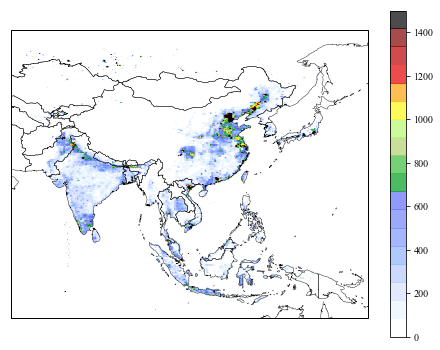

In [154]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
fname =r'/Users/HYF/Dropbox/data/geo/shp/china_basic_map/country1.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                               ccrs.PlateCarree(), facecolor='None',edgecolor ='k',linewidth = 0.4)
ax.add_feature(shape_feature)
xx,yy = np.meshgrid(lon,lat)
ma_da = np.ma.masked_less_equal(voc_2010/1000.0,0)
ll = plt.pcolormesh(xx,yy,ma_da,alpha =0.7,cmap =nclcmaps.cmaps('precip2_17lev'),transform=ccrs.PlateCarree(),vmax = 1500.0)#nclcmaps.cmaps('precip2_17lev'),nclcmaps.cmaps('precip2_17lev')
plt.colorbar(ll)
plt.show()


In [198]:
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
def VOC_China_back(ax):
    fname =r'/Users/HYF/Dropbox/data/geo/shp/china_basic_map/country1.shp'
    shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                    ccrs.PlateCarree(), facecolor='None',edgecolor ='k',linewidth = 0.4)
    ax.add_feature(shape_feature)
    
    fname = r'/Users/HYF/Dropbox/data/geo/shp/china_basic_map/bou2_4p.shp'
    shape_feature = ShapelyFeature(Reader(fname).geometries(), ccrs.PlateCarree(),facecolor='None', edgecolor ='grey', linewidth = 0.5, alpha =0.5)
    ax.add_feature(shape_feature, zorder =3)
    
    sea_name = r'/Users/HYF/Dropbox/赤峰项目/TRACE/IPYNB/data/INPUT/GIS/nanhai/nanhai.shp'
    shape_feature = ShapelyFeature(Reader(sea_name).geometries(),
                                    ccrs.PlateCarree(), facecolor='k',edgecolor ='k',linewidth=0.5)
    ax.add_feature(shape_feature)
    ax.set_xticks(np.arange(extent[0]+7, extent[1], 15), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(extent[2]+8,60, 10), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.set_extent(extents=[72,135,17,52])

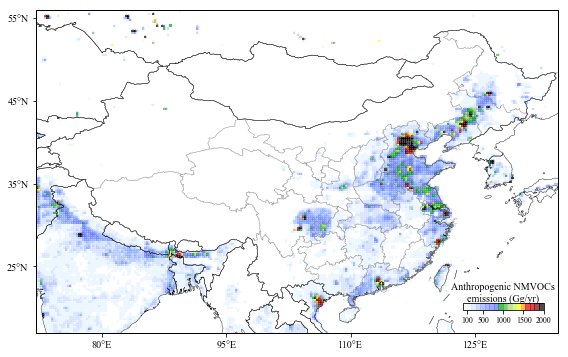

In [209]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
VOC_China_back(ax)
xx,yy = np.meshgrid(lon,lat)
ma_da = np.ma.masked_less_equal(voc_2010/1000.0,2)
voc_plot= plt.pcolormesh(xx,yy,ma_da,alpha =0.7,cmap =nclcmaps.cmaps('precip2_17lev'),transform=ccrs.PlateCarree(),vmax = 2000.0)#nclcmaps.cmaps('precip2_17lev'),

cbaxes = fig.add_axes([0.81, 0.18, 0.14, 0.015]) 
cbar = plt.colorbar(voc_plot,cax=cbaxes,orientation='horizontal')
loc_ = np.array([100,500,1000,1500,2000])
cbar.set_ticks(loc_)
cbar.set_ticklabels(loc_,)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xlabel(r'Anthropogenic NMVOCs'+'\n'+ 'emissions (Gg/yr)',fontsize = 10,labelpad = -43)

#pyplot.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)[s
plt.tight_layout()
plt.savefig("./2010_VOC_emission_label_editted.png",dpi=600)
plt.show()

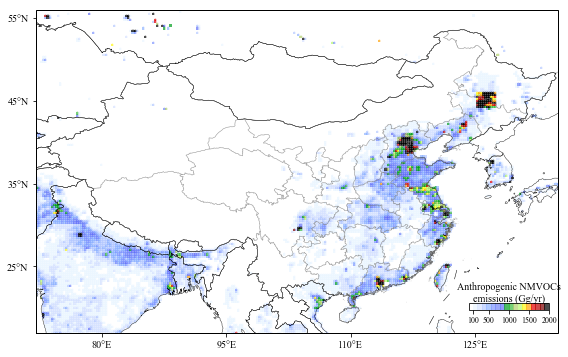

In [210]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
VOC_China_back(ax)
xx,yy = np.meshgrid(lon,lat)
ma_da = np.ma.masked_less_equal(voc_2014/1000.0,2)
voc_plot= plt.pcolormesh(xx,yy,ma_da,alpha =0.7,cmap =nclcmaps.cmaps('precip2_17lev'),transform=ccrs.PlateCarree(),vmax = 2000.0)#nclcmaps.cmaps('precip2_17lev'),

cbaxes = fig.add_axes([0.82, 0.18, 0.14, 0.015]) 
cbar = plt.colorbar(voc_plot,cax=cbaxes,orientation='horizontal')
loc_ = np.array([100,500,1000,1500,2000])
cbar.set_ticks(loc_)
cbar.set_ticklabels(loc_,)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xlabel(r'Anthropogenic NMVOCs'+'\n'+ 'emissions (Gg/yr)',fontsize = 10,labelpad = -43)
plt.tight_layout()
plt.savefig("./2014_VOC_emission_label_editted.png",dpi=600)
plt.show()

In [168]:
cc.max()

23349.576